**Importing the Required Libraries**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#This convert categorical data into numerical data
from imblearn.over_sampling import SMOTE #SMOTE(Synthetic Minority Over sampling technique)This technique helps in dealing with class imbalance issues in dataset
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle#It is commonly used to save and load machine learning models,data structures


**Data Loading and Understanding**

In [74]:
#Reading csv dataset to pandas dataframe
autism_dataset=pd.read_csv('/content/train (1).csv')

**Initial inspection**

In [75]:
#Finding null values in all columns
autism_dataset.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [76]:
#This command gives the shape of our dataset
autism_dataset.shape

(800, 22)

In [77]:
#It displays the top 5 rows of our dataset
autism_dataset.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [78]:
#This command will display all the columns present in dataset
pd.set_option('display.max_column',None)


In [79]:
#This command gives the information like datatype of columns and values
autism_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [80]:
#astype command is used to convert the data type of our column
autism_dataset['age']=autism_dataset['age'].astype(int)

In [81]:
autism_dataset.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [82]:
#For loop is used to display all the unique values in all column
for col in autism_dataset.columns:
  numerical_features=['ID','age','result']
  if col not in numerical_features:
    print(col,autism_dataset[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [83]:
autism_dataset=autism_dataset.drop(columns=['ID','age_desc'])

In [84]:
autism_dataset.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [85]:
autism_dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [86]:
autism_dataset['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [87]:
#Creating a mapping dictionary for country names
mapping={
    "Hong Kong":"China",
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"United States"
}
#Replacing value in the country column
autism_dataset['contry_of_res']=autism_dataset['contry_of_res'].replace(mapping)

In [88]:
autism_dataset['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [89]:
#Target class distribution
autism_dataset['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights** :
 - There is class imbalance in target column
 - There are missing values in ethinicity and relation column


**Exploratory Data Analysis(EDA)**

In [90]:
autism_dataset.shape

(800, 20)

In [91]:
autism_dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

**Numerical columns:**
- Age
-Result

In [92]:
sns.set_theme(style='darkgrid')

**Distribution Plots**

Mean: 27.96375
Median: 24.0


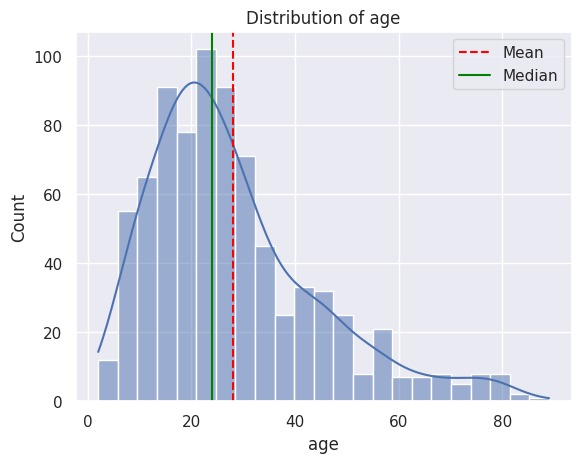

In [93]:
sns.histplot(autism_dataset['age'],kde=True)
plt.title('Distribution of age')
age_mean=autism_dataset['age'].mean()
age_median=autism_dataset['age'].median()
print("Mean:",age_mean)
print("Median:",age_median)
plt.axvline(age_mean,color="Red",linestyle="--",label="Mean")
plt.axvline(age_median,color="Green",linestyle="-",label="Median")
plt.legend()
plt.show()

The graph is right skewed distribution (long tail on the right), which means mean value is greater than median value.

Mean: 8.537303106501248
Median: 9.605299308


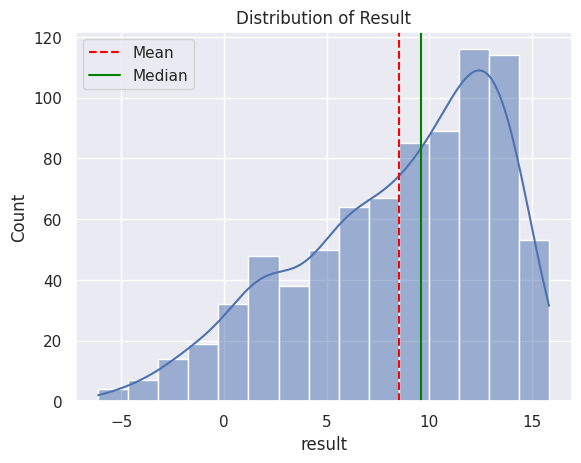

In [94]:
sns.histplot(autism_dataset['result'],kde=True)
plt.title("Distribution of Result")
result_mean=autism_dataset['result'].mean()
result_median=autism_dataset['result'].median()
print("Mean:",result_mean)
print("Median:",result_median)
plt.axvline(result_mean,color="Red",linestyle="--",label="Mean")
plt.axvline(result_median,color="Green",linestyle="-",label="Median")
plt.legend()
plt.show()

The graph is Left-skewed distribution (long tail on the left), the mean is smaller than the median.

**Boxplot for identifying outliers in numerical columns**

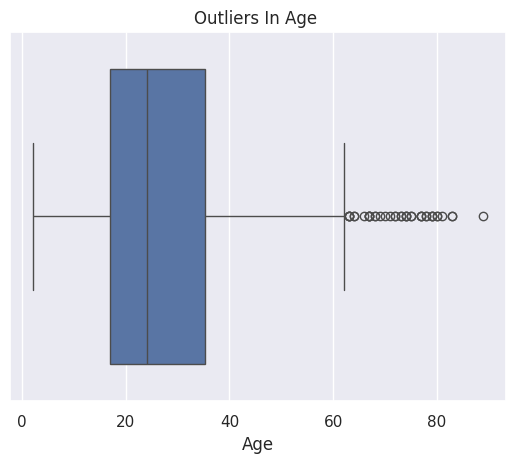

In [95]:
#Boxplot
sns.boxplot(x=autism_dataset['age'])
plt.title("Outliers In Age ")
plt.xlabel("Age")
plt.show()

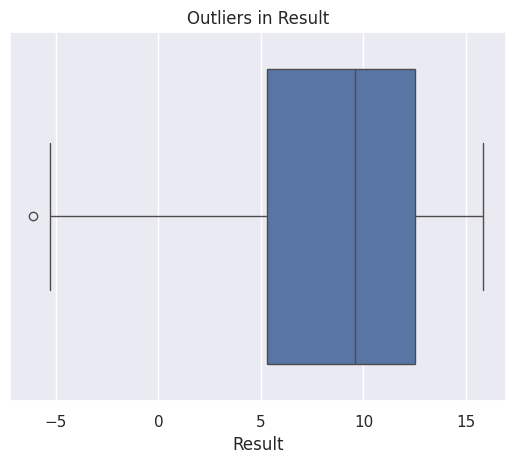

In [96]:
sns.boxplot(x=autism_dataset['result'])
plt.title("Outliers in Result")
plt.xlabel("Result")
plt.show()


In [97]:
#Counting the outliers
Q1=autism_dataset['age'].quantile(0.25)
Q3=autism_dataset['age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=autism_dataset[(autism_dataset['age']<lower_bound)|(autism_dataset['age']>upper_bound)]


In [98]:
len(age_outliers)

39

In [99]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [100]:
Q1=autism_dataset['result'].quantile(0.25)
Q3=autism_dataset['result'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=autism_dataset[(autism_dataset['result']<lower_bound)|(autism_dataset['result']>upper_bound)]


In [101]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [102]:
len(result_outliers)

1

**Univariate Analysis of Categorical columns**

In [103]:
autism_dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [104]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
'relation']

**Plotting Count Plot for categorical columns**

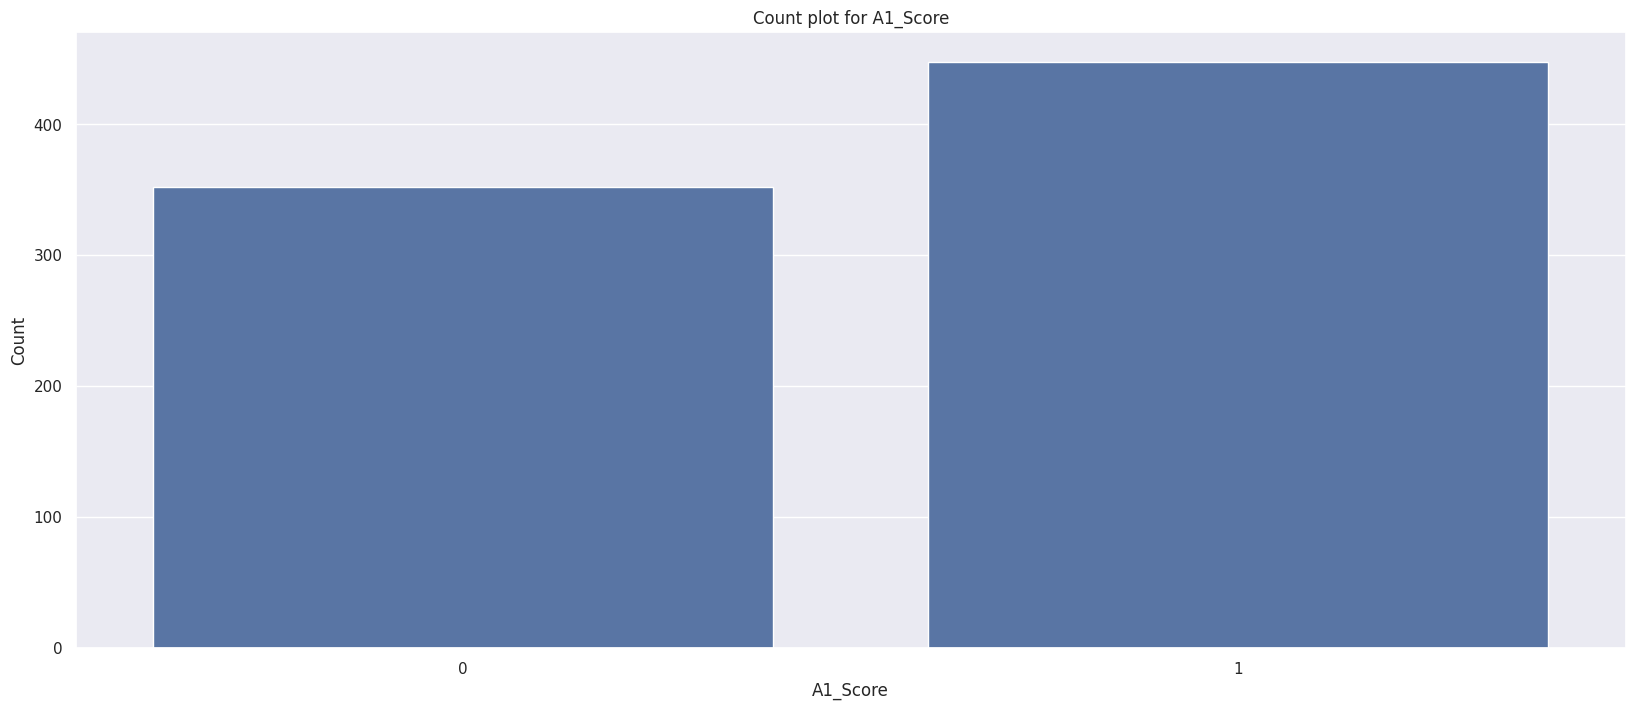

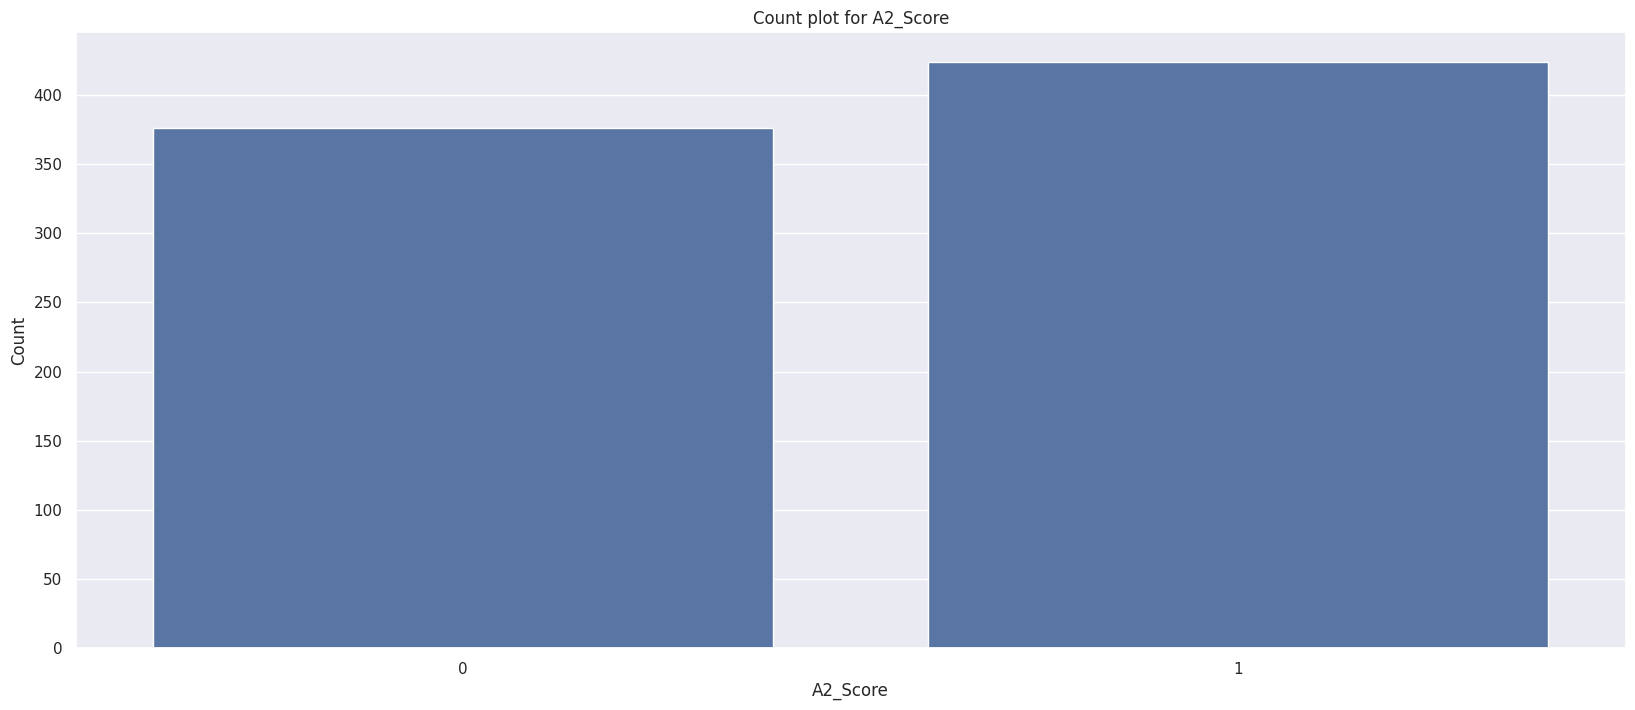

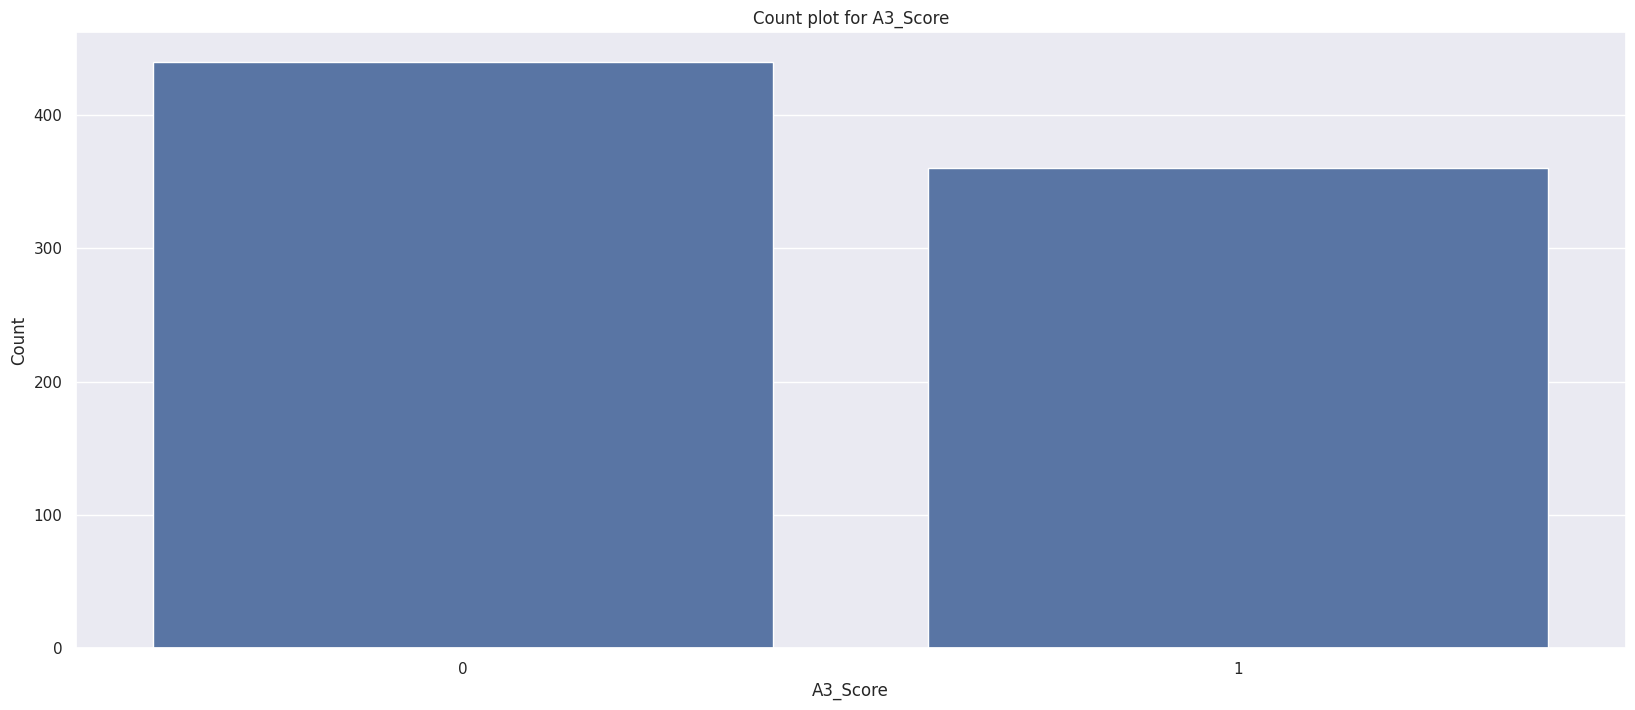

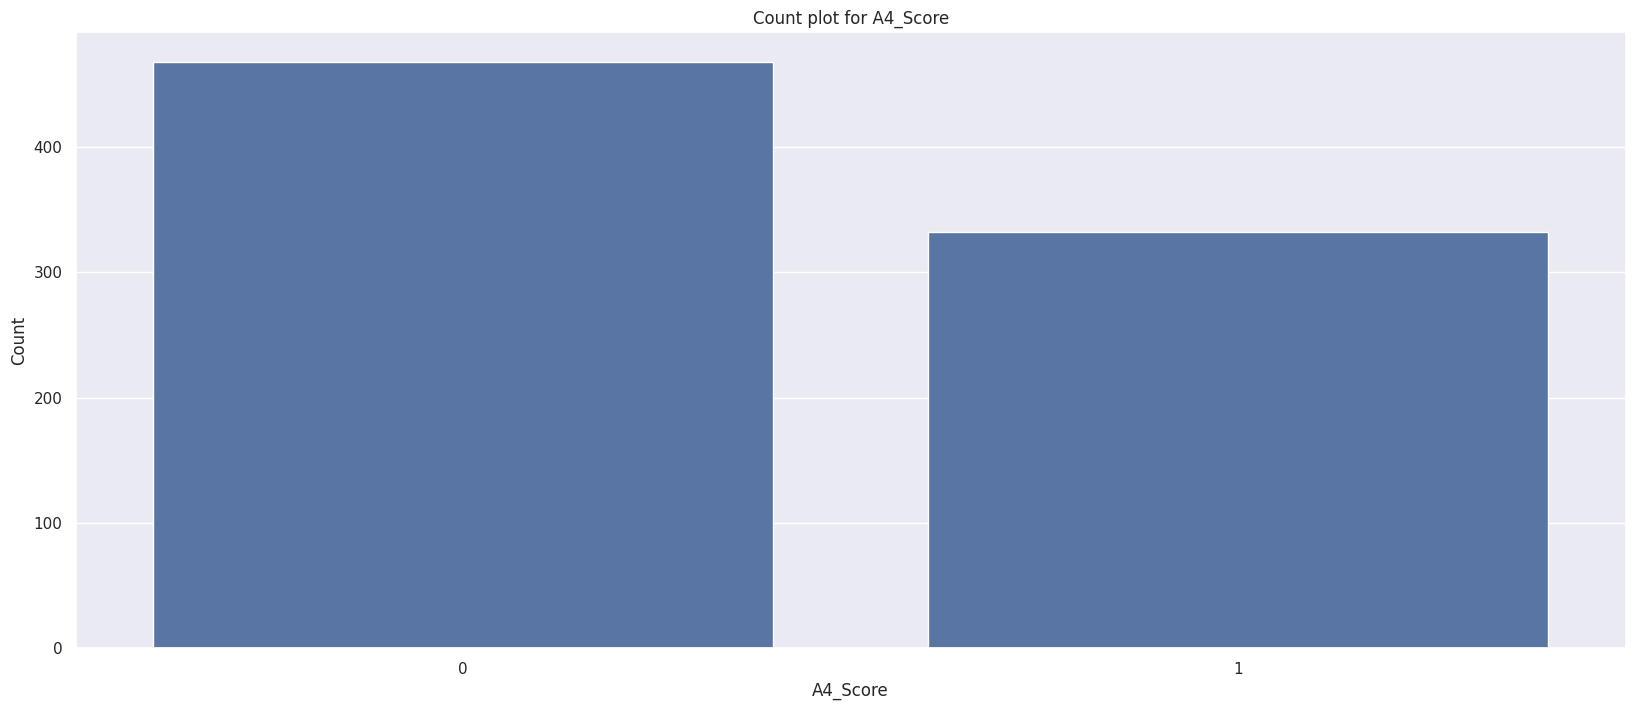

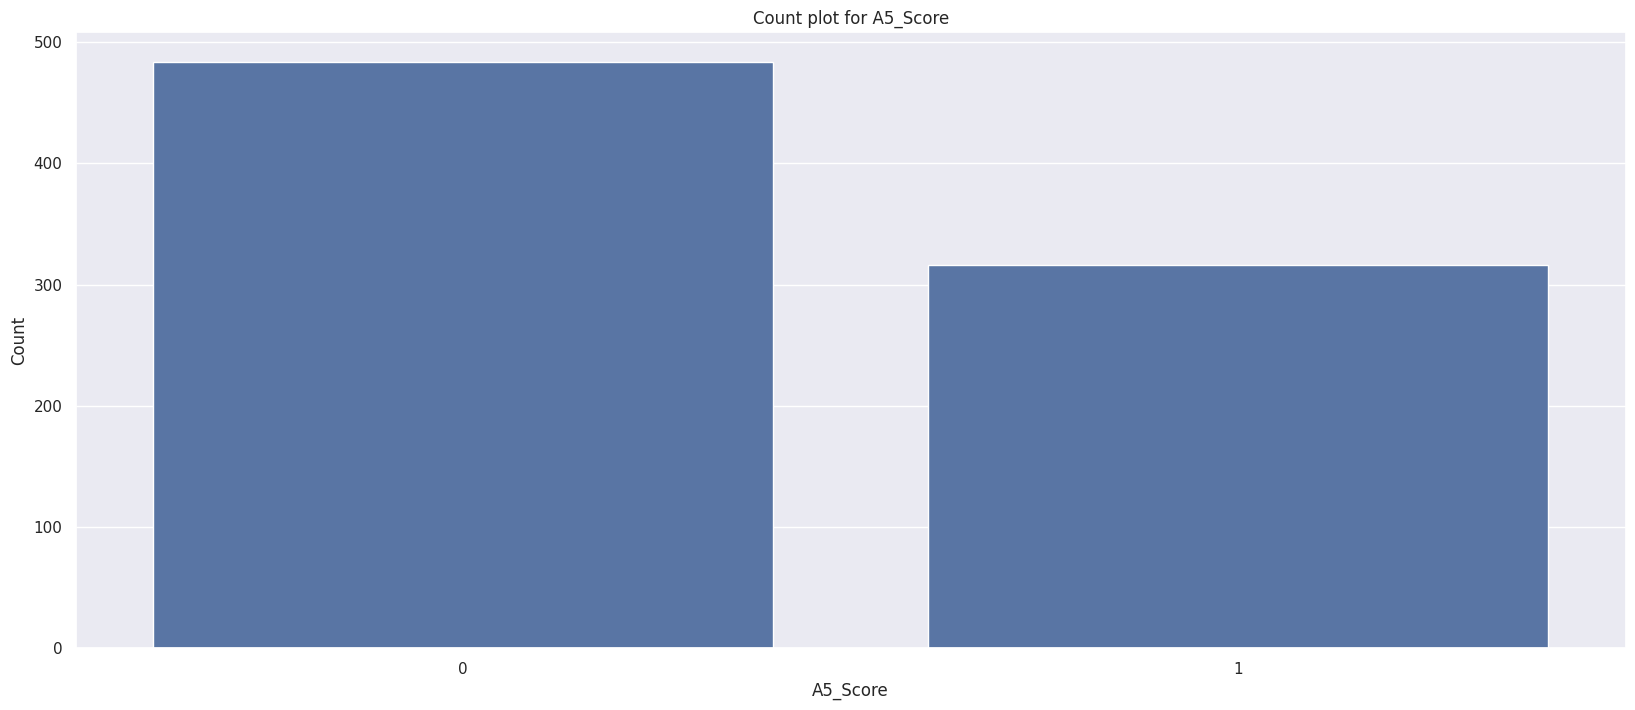

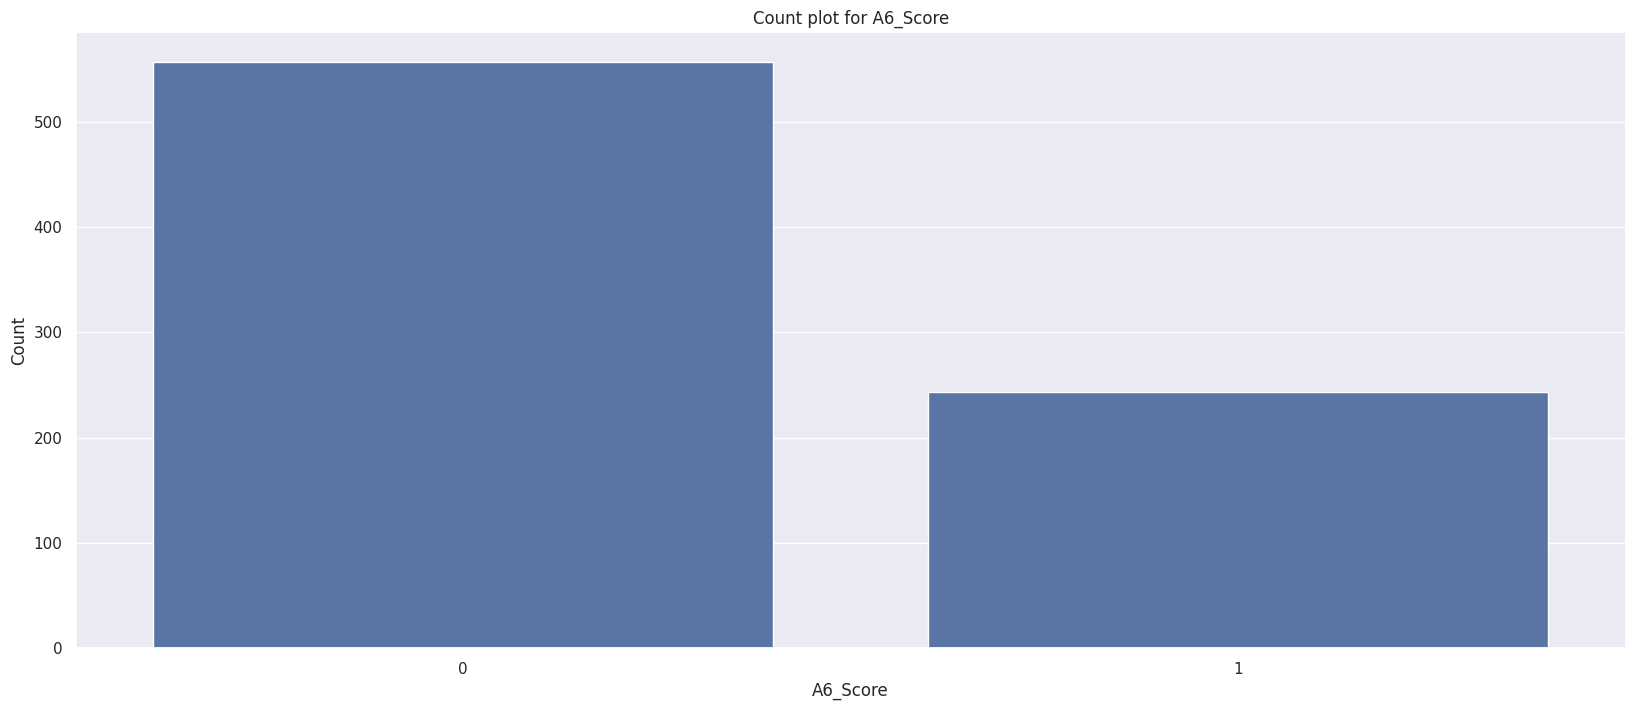

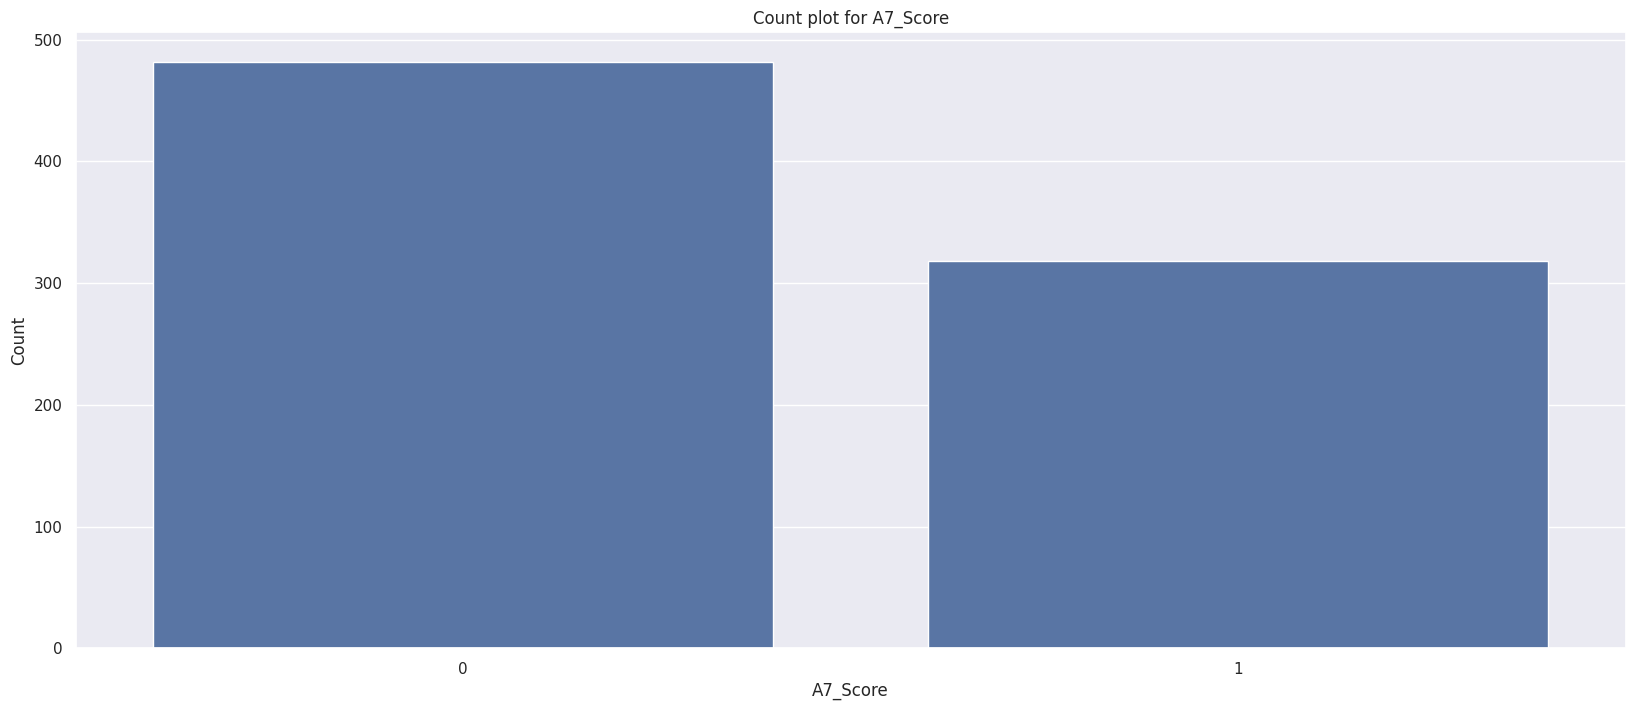

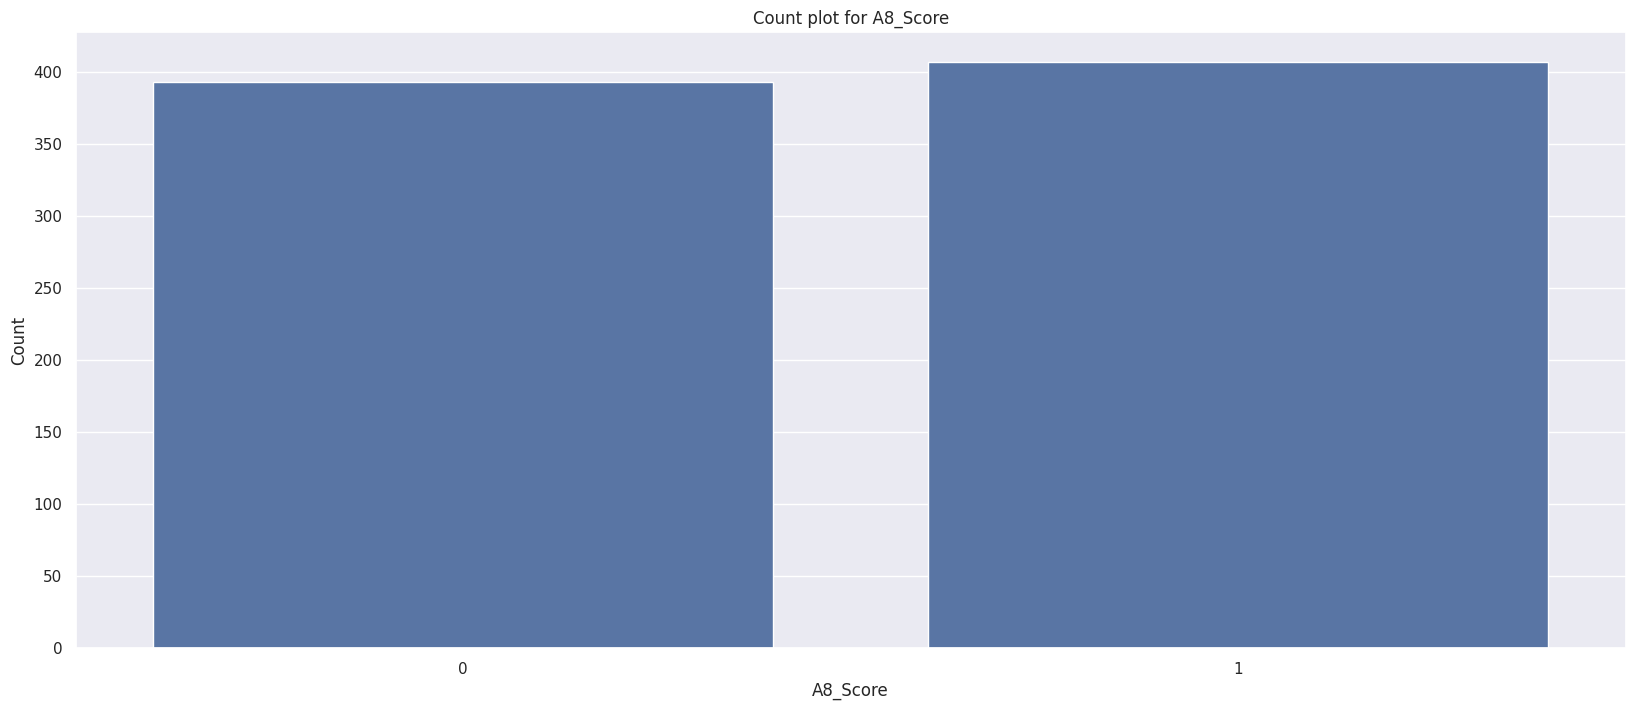

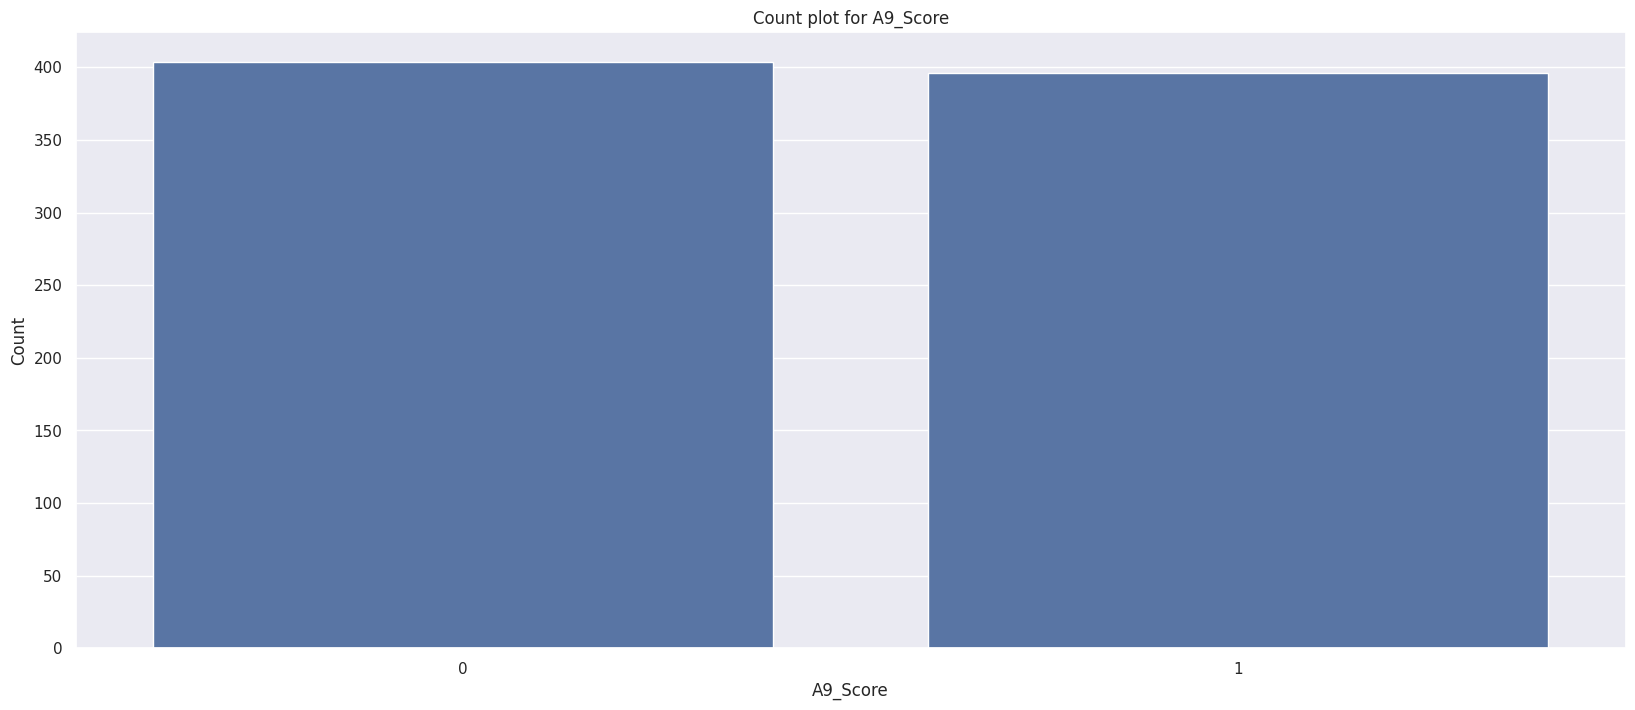

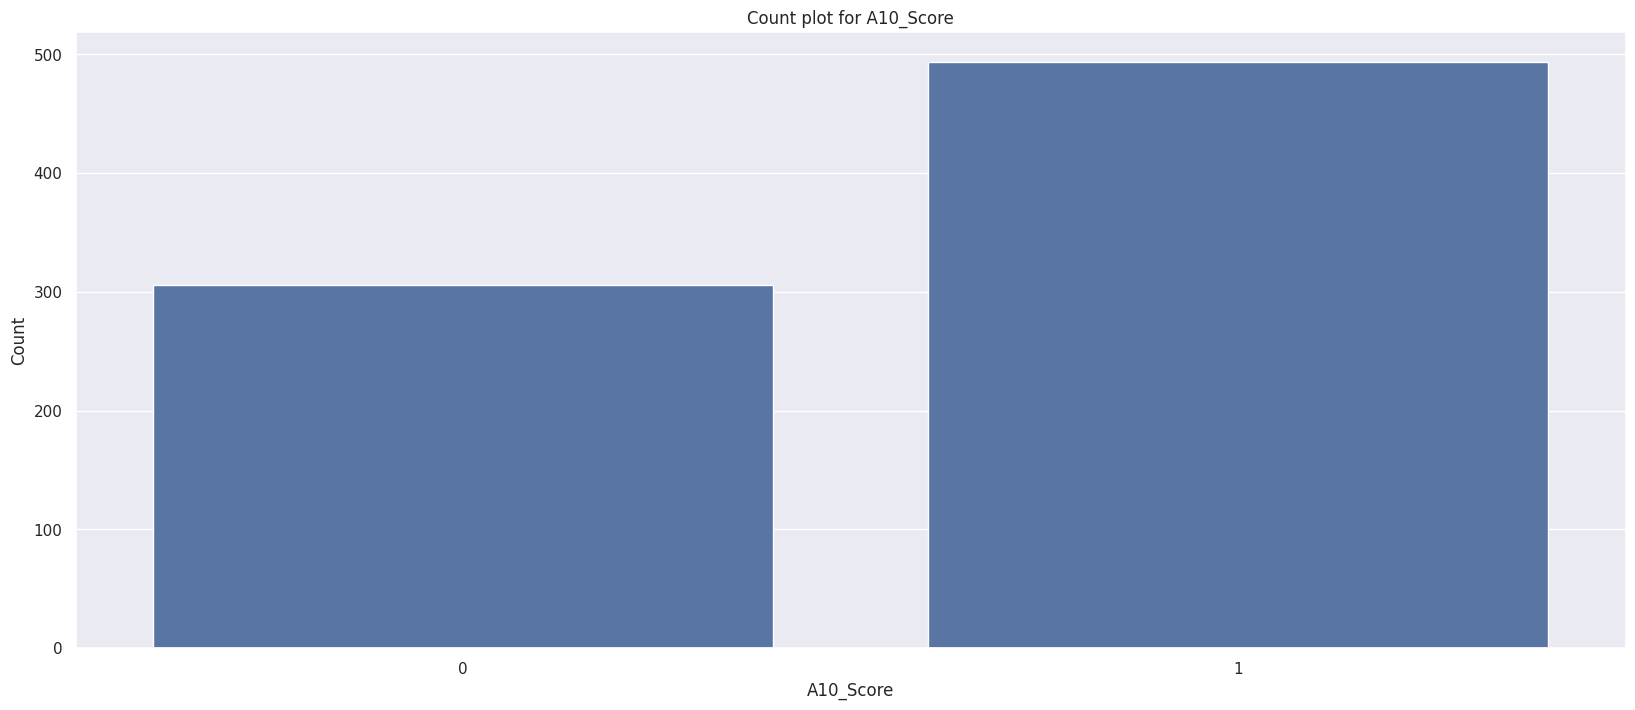

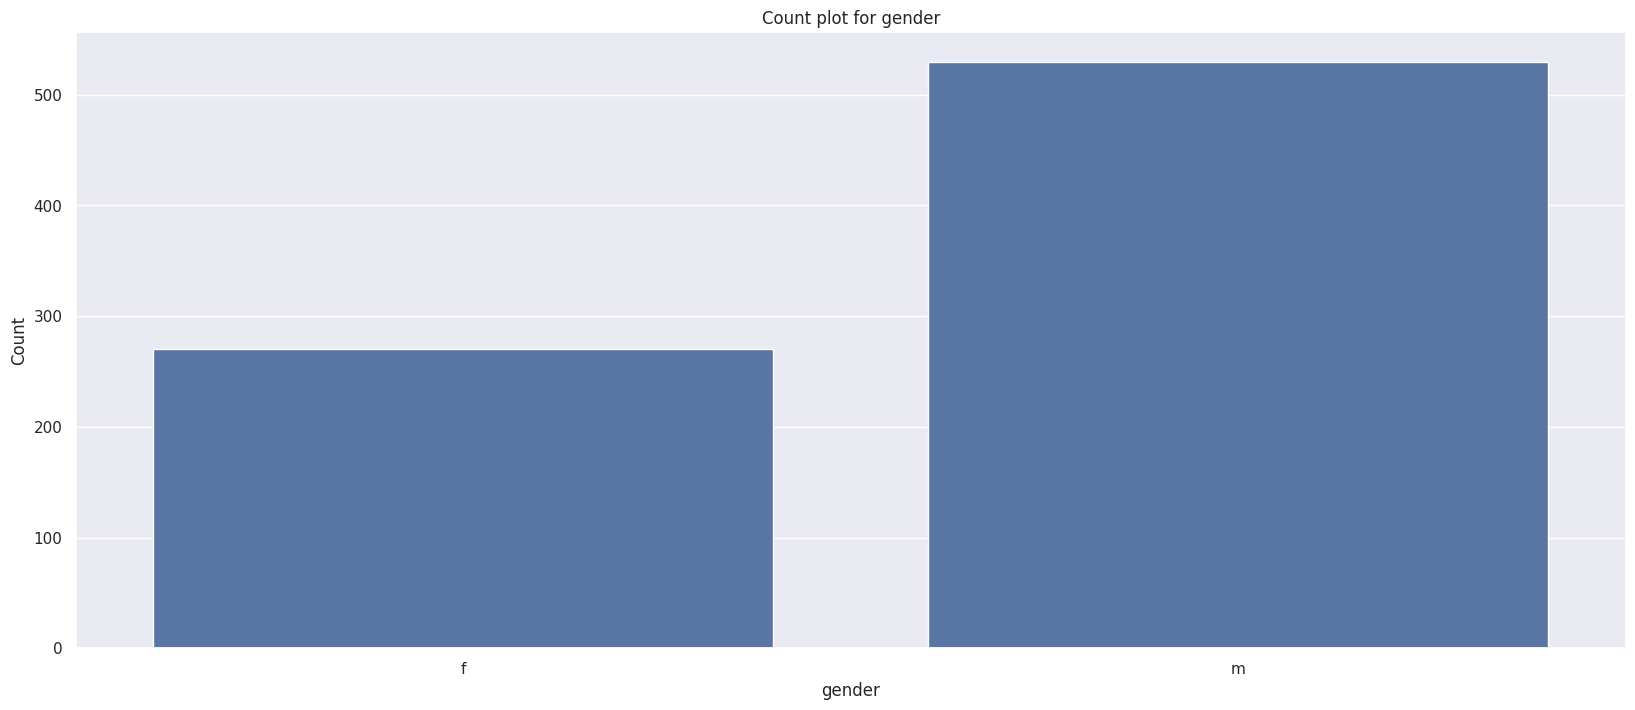

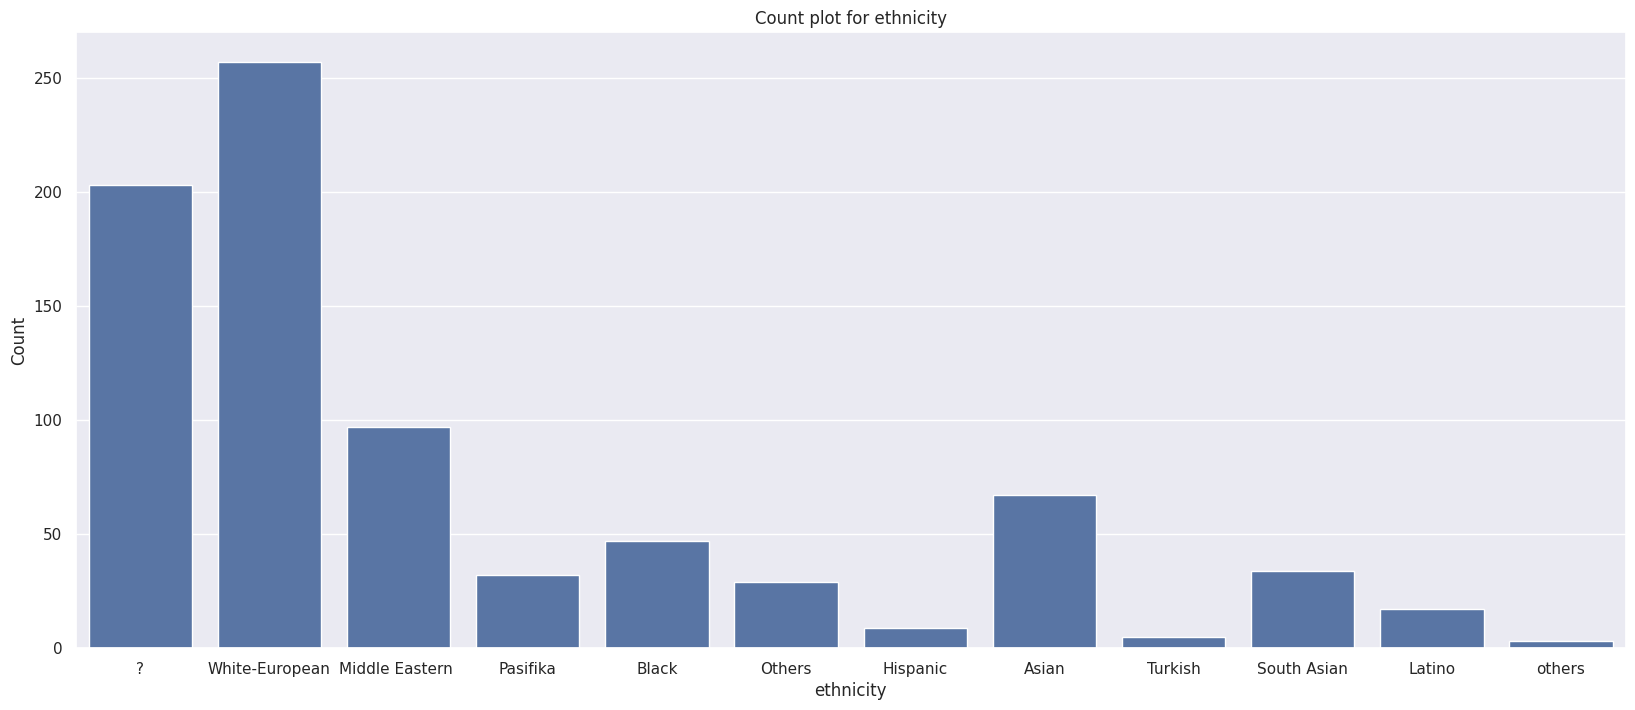

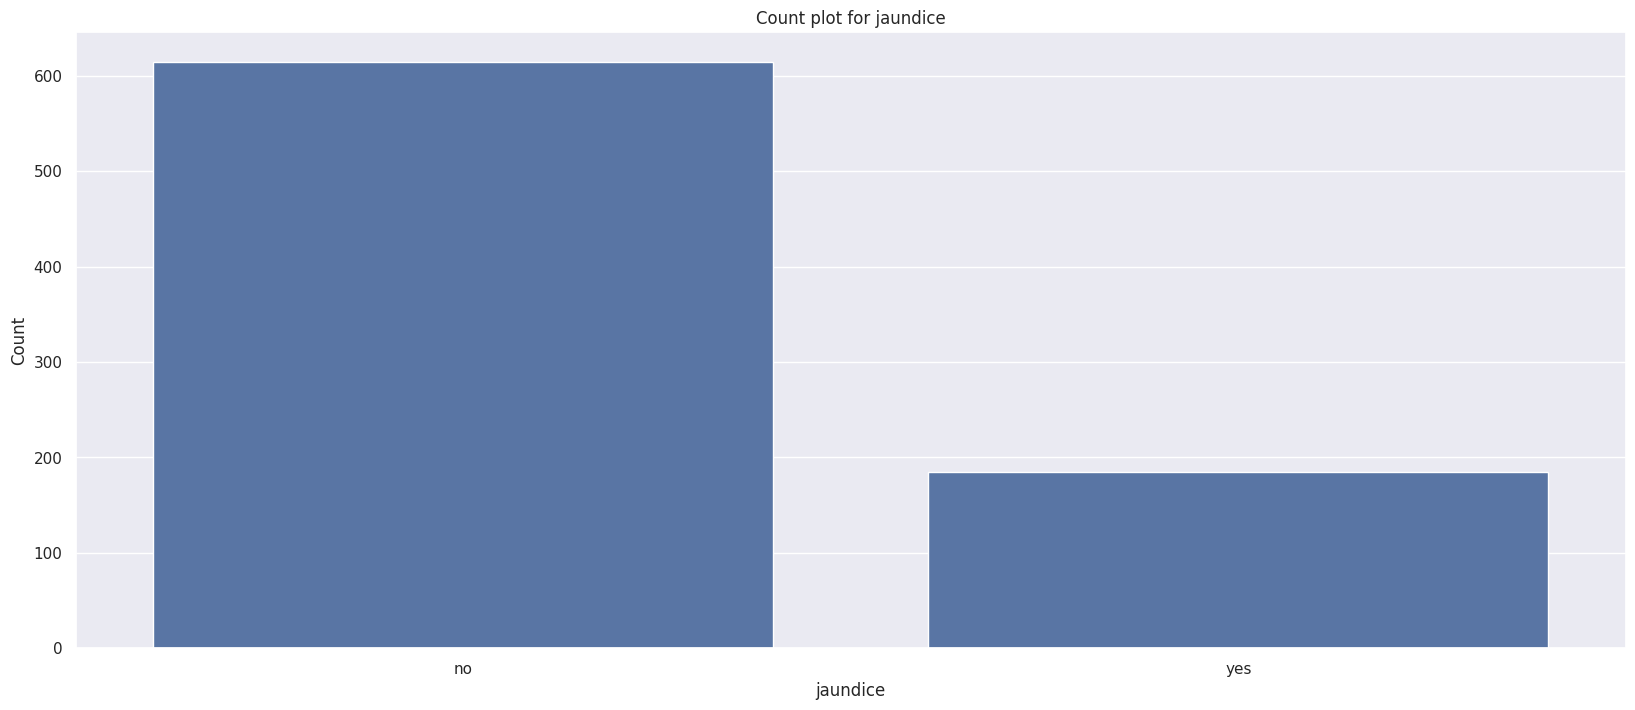

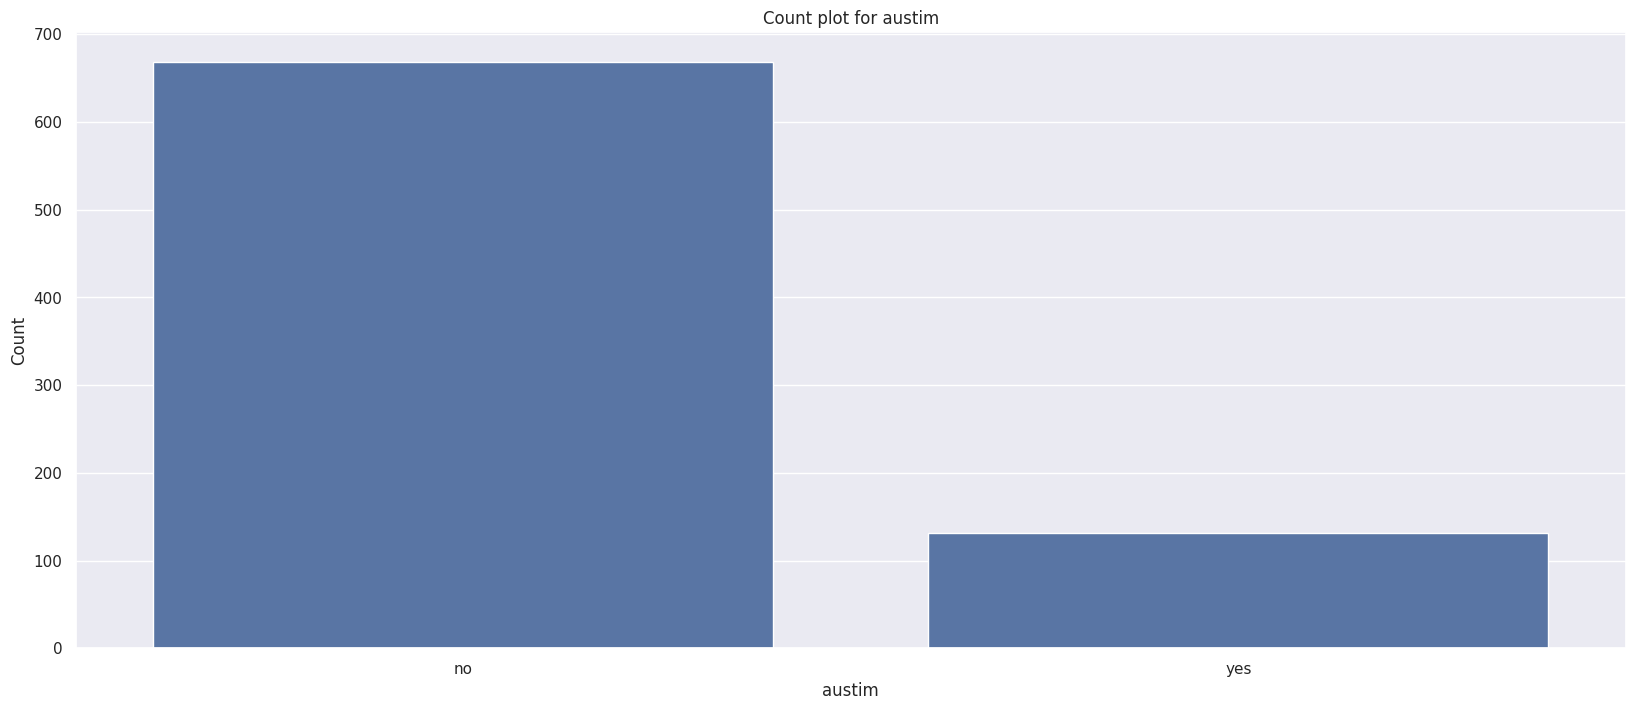

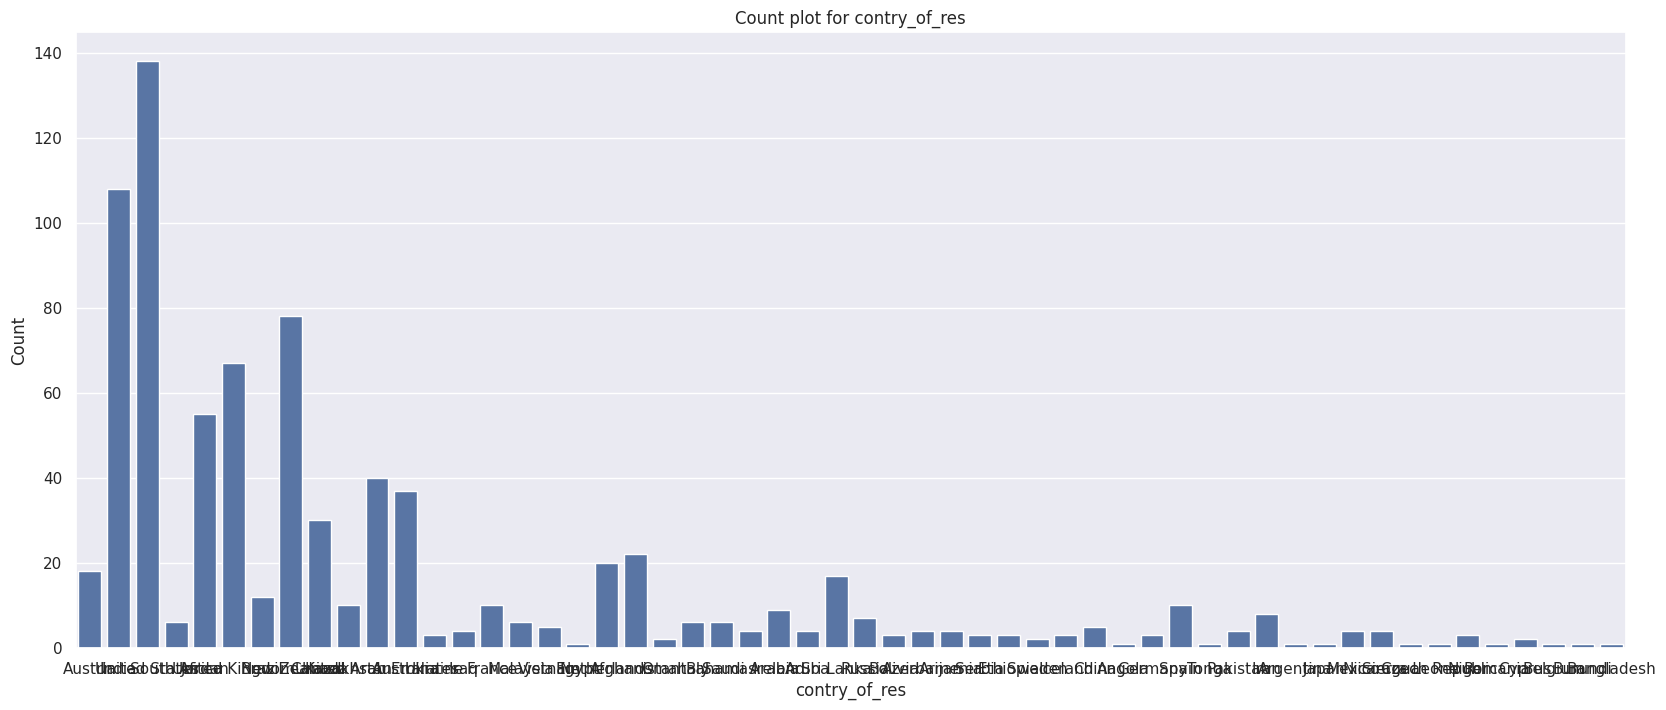

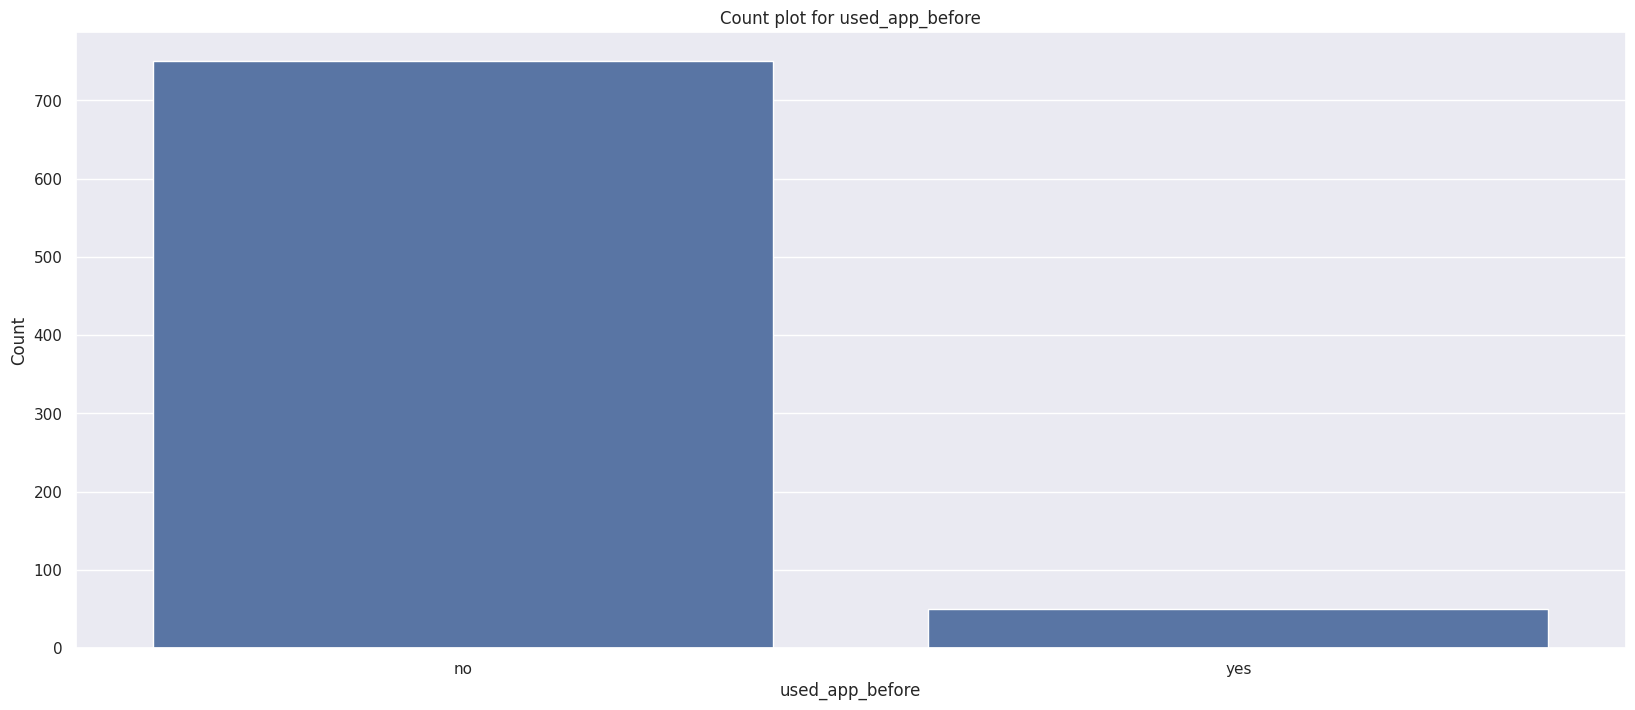

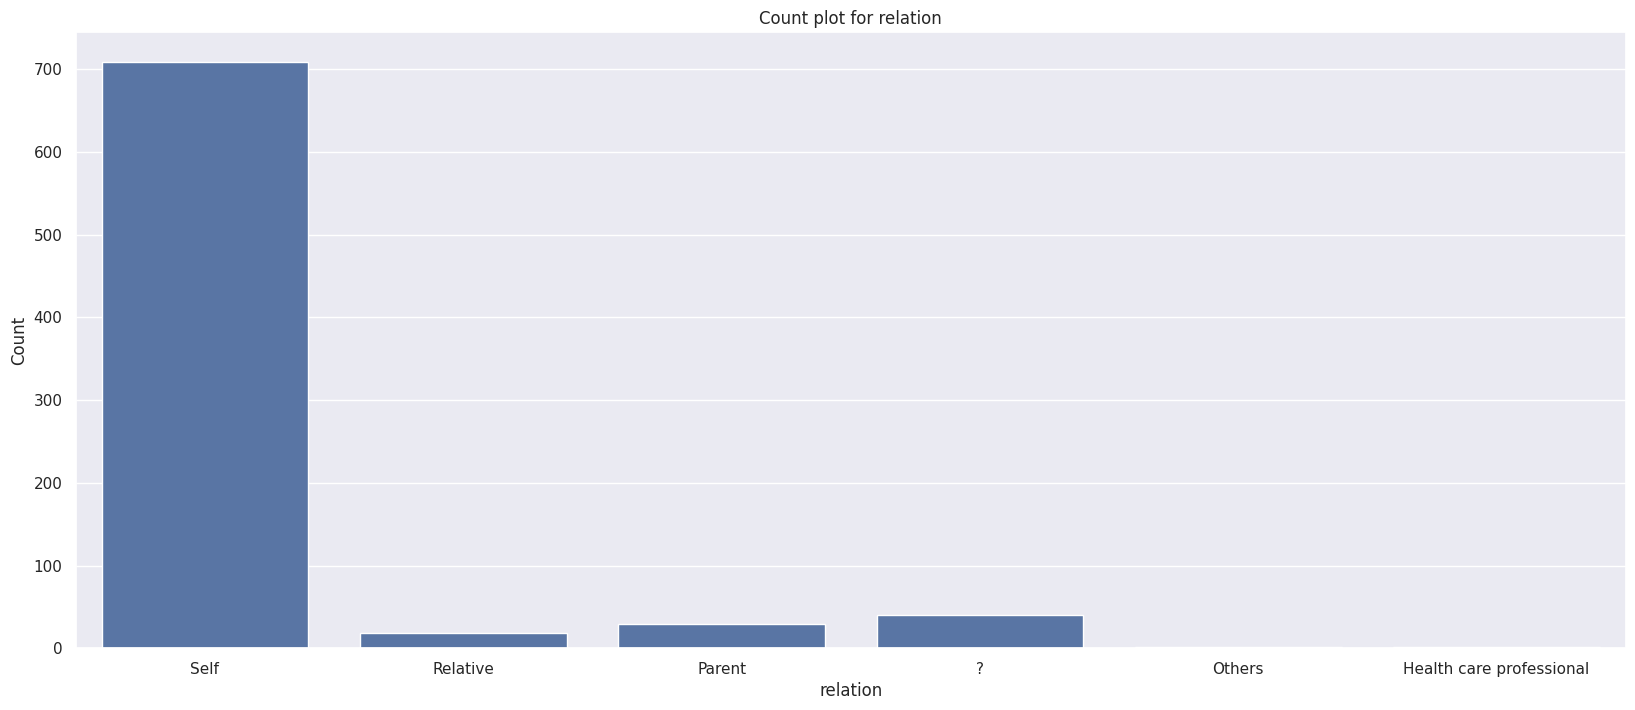

In [105]:
#Using for loop to plot countplot for all categorical columns
for col in categorical_columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=autism_dataset[col])
    plt.title(f"Count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

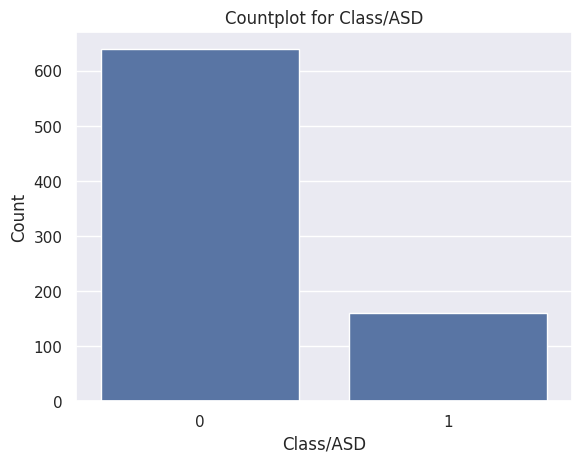

In [106]:
#Countplot for target column
sns.countplot(x=autism_dataset['Class/ASD'])
plt.title("Countplot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [107]:
autism_dataset['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


**Handling Missing values**

In [108]:
autism_dataset['ethnicity']=autism_dataset['ethnicity'].replace({"?":"Others","others":"Others"})

In [109]:
autism_dataset['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
Others,235
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Latino,17
Hispanic,9


In [110]:
autism_dataset['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [111]:
autism_dataset['relation']=autism_dataset['relation'].replace({"?":"Others","Relative":"Others","Parent":"Others","Health care professional":"Others"})

In [112]:
autism_dataset['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [113]:
autism_dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [114]:
object_columns=autism_dataset.select_dtypes(include=["object"]).columns

In [115]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


**Label Encoding**

In [116]:
#Creating a dictionary to store encoders
encoders={}

#Using for loop to apply label encoding to categorical columns by iteration
for col in object_columns:
  le=LabelEncoder()
  autism_dataset[col]=le.fit_transform(autism_dataset[col])
  encoders[col]=le
#Saving the encoders as pickle file
with open("encoders.pkl","wb")as f:
  pickle.dump(encoders,f)

In [141]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [117]:
autism_dataset.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0


**Bivariate Analysis**

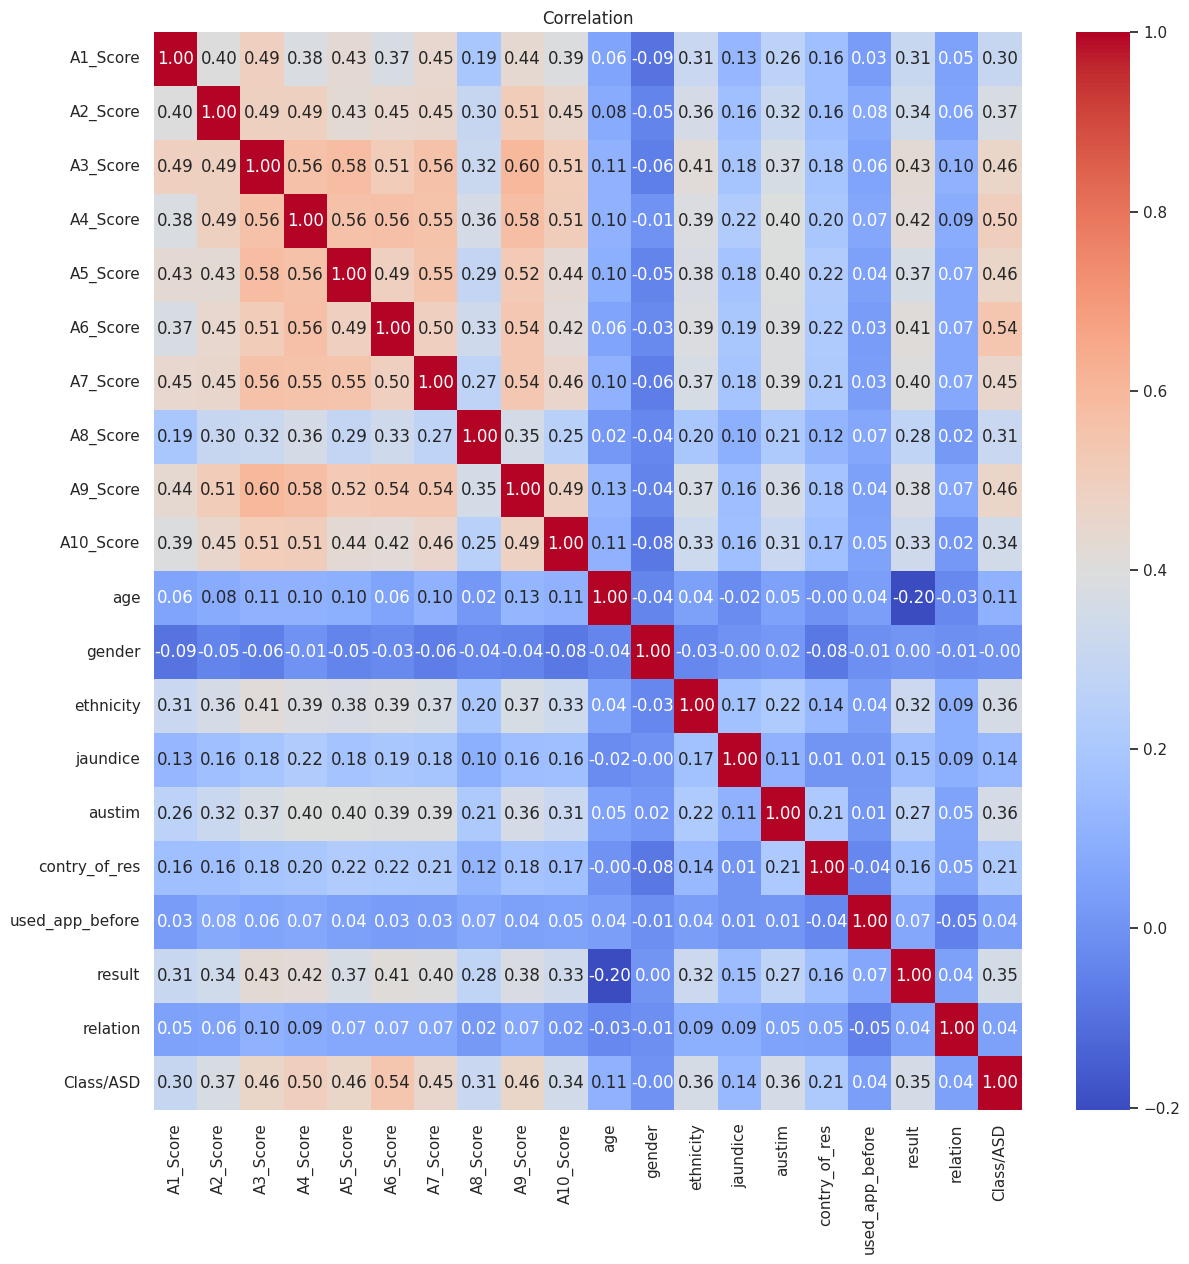

In [118]:
#Correlation Matrix
plt.figure(figsize=(14,14))
sns.heatmap(autism_dataset.corr(),annot=True,cmap="coolwarm",fmt="0.2f")
plt.title("Correlation")
plt.show()

**Data Preprocessing**




Handling Outliers

In [119]:
#Creating a function to replace outlier with median because median doesn't get affected by outliers
def replacing_outlier_with_median(autism_dataset,column):
  Q1=autism_dataset[column].quantile(0.25)
  Q3=autism_dataset[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  median=autism_dataset[column].median()
  autism_dataset[column]=autism_dataset[column].apply(lambda x: median if x <lower_bound or x > upper_bound else x)
  return autism_dataset


In [120]:
#Replacing outliers in age and result column
autism_dataset=replacing_outlier_with_median(autism_dataset,"age")
autism_dataset=replacing_outlier_with_median(autism_dataset,"result")
autism_dataset.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


**Splitting the dataset**

In [121]:
x=autism_dataset.drop(columns=['Class/ASD'])
y=autism_dataset['Class/ASD']

In [122]:
print(x)


     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [123]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


**Performing train test split**

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [125]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [126]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE(Synthetic minority oversampling technique):**
- It is a popular technique to deal with class imbalance in dataset

In [127]:
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [128]:
y_train_smote.value_counts()

,count
Class/ASD,
1,515
0,515


**Model Training**

In [129]:
# Creating dictionary of classifiers
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)}

In [130]:
#Dictionary to store cross validation results
cv_scores={}

#Performing 5  fold cross validation for every model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters....")
  scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} Cross Validation score:{np.mean(scores):0.2f}")
  print("-"*50)

Training Decision Tree with default parameters....
Decision Tree Cross Validation score:0.86
--------------------------------------------------
Training Random Forest with default parameters....
Random Forest Cross Validation score:0.92
--------------------------------------------------
Training XGBoost with default parameters....
XGBoost Cross Validation score:0.90
--------------------------------------------------


In [131]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

**Model Selection and hyperparameter tuning**

In [132]:
#Intializing models
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)

In [133]:
param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]

}
param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [134]:
# hyperparameter tuning for 3 tree based models
random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring="accuracy",random_state=42)



In [135]:
#Fitting the model
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [136]:
print(random_search_dt.best_estimator_," ",random_search_dt.best_score_)
print(random_search_rf.best_estimator_," ",random_search_rf.best_score_)
print(random_search_xgb.best_estimator_," ",random_search_xgb.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)   0.8699029126213592
RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)   0.9271844660194175
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)   0.9087378640776699


In [137]:
#Finding the model with best score
best_model=None
best_score=0
if random_search_dt.best_score_> best_score:
  best_score=random_search_dt.best_score_
  best_model=random_search_dt.best_estimator_

if random_search_rf.best_score_> best_score:
  best_score=random_search_rf.best_score_
  best_model=random_search_rf.best_estimator_

if random_search_xgb.best_score_> best_score:
  best_score=random_search_xgb.best_score_
  best_model=random_search_xgb.best_estimator_


In [138]:
print("Best Model:",best_model)
print(f"Best Cross validation accuracy:{best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross validation accuracy:0.93


In [139]:
#Saving the model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

**Evaluation**

In [140]:
#Evaluating the test data
y_test_pred=best_model.predict(x_test)
print("Accuracy:\n",accuracy_score(y_test_pred,y_test))
print("confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("classification report:\n",classification_report(y_test,y_test_pred))

Accuracy:
 0.81875
confusion matrix:
 [[108  16]
 [ 13  23]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

